#  Thermal Driving Spatial Distibutions 

Mean Thermal Driving over final year for Ocean1-COM experiment


In [1]:
#Load required packages
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import cftime
import cmocean as cm

from netCDF4 import Dataset
import os.path
import matplotlib.colors as colors

Models: 
```
COCO   MITgcm-BAS          MITgcm-JPL  MOM6_SIGMA_ZSTAR  NEMO-CNRS      POP2x
FVCOM  MITgcm_BAS_Coupled  MOM6        MPAS-Ocean        NEMO-UKESM1is  ROMS-UTAS
```

In [2]:
## folder where the isomip-plus github repo is located
baserepo = '/g/data/x77/cy8964/isomip-plus/'
## folder where you downloaded the zipped Google Drive data
basedrive = '/g/data/x77/cy8964/ISOMIP+Data-new/'


# load the data from the text files, which point to the right location of the file in the drive structure
Ocean0_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_COM = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-COM.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean0_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean0-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean1_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean1-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)
Ocean2_TYP = np.loadtxt(baserepo+'notebooks/file-pointers/Ocean2-TYP.txt', dtype = 'str', delimiter = ',',usecols = 0)

def get_labels(expt):
    '''
    Get labels of experiments
    Make some modifications to names
    '''
    labels = []
    for fileIndex in range(len(expt)):
        fileName = expt[fileIndex]
        baseName = os.path.basename(basedrive +fileName)
        modelName = ' '.join(baseName.split('_')[2:]).split('.')[0]
        if "COM" in fileName:
            #make edits to COM names
            if "MOM6" in fileName:
                if "SIGMA_ZSTAR" not in fileName:
                    modelName = modelName + '-LAYER'
            elif "ROMS" in fileName:
                modelName = "ROMS"
        elif "TYP" in fileName:
            # make edits to COM names
            if "MOM6" in fileName:
                modelName = modelName + '-LAYER'
            elif "CNRS" in fileName:
                if "TYPa" in fileName:
                    modelName = modelName + '-TYPa'
                elif "TYPb" in fileName:
                    modelName = modelName + '-TYPb'
            elif "tides" in fileName:
                modelName = "ROMS-tides"
            elif "ROMS" in fileName:
                modelName = "ROMS"
        labels.append(modelName.strip('V3').replace(" ", "-"))
    return labels


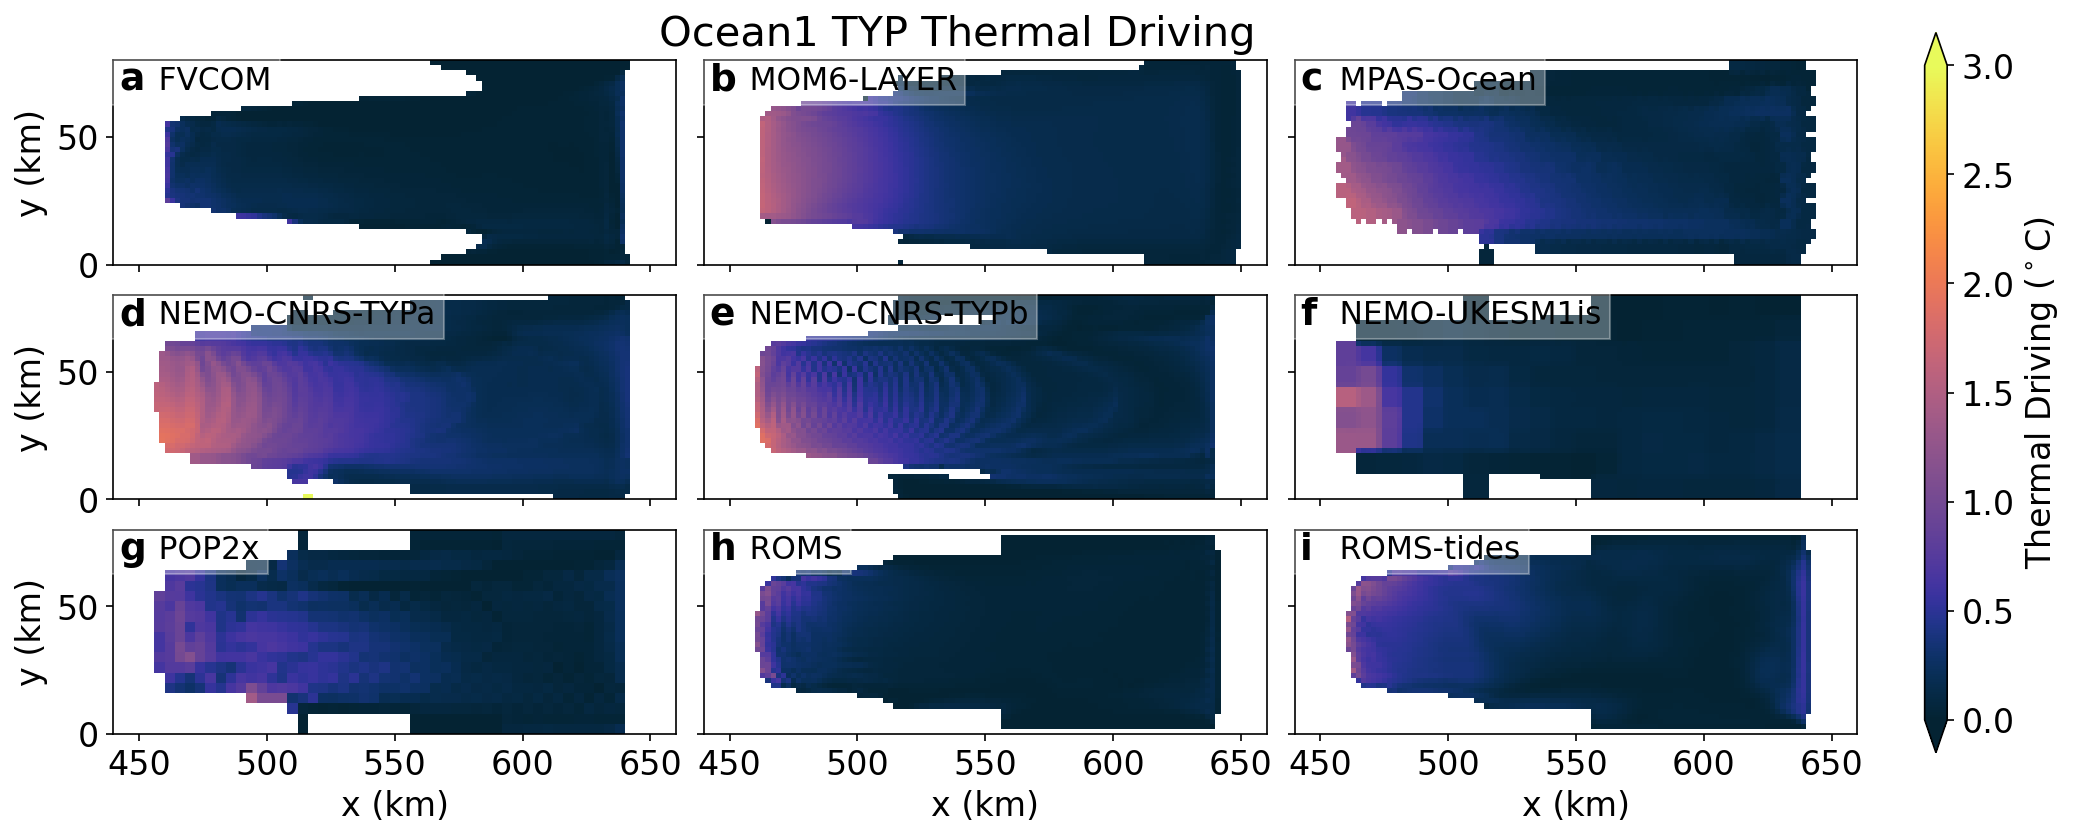

In [3]:
expt = Ocean1_TYP
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(15, 6),facecolor='w',dpi = 150)
time = 12

vmin = 0.
vmax = 3.

xlim = [440., 660.]

for i in np.arange(length):
    ax = plt.subplot(3,nrows,i+1)
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    mesh = plt.pcolormesh(
        1e-3 * ds.x.values, 1e-3 * ds.y.values, td.values, 
        cmap=cm.cm.thermal, vmin=vmin, vmax=vmax, shading='nearest')
    plt.xlim(xlim)
    mesh.axes.set_aspect('equal')
    
    plt.text(0.01,0.975,'    '+labels[i], fontsize = 15, transform=ax.transAxes, va='top',color = 'k',bbox=dict(facecolor='w', alpha=0.3,ec = 'w'))
    plt.text(0.01,0.99,alphabet[i], fontsize = 18, transform=ax.transAxes, fontweight='bold', va='top')
    if (i==1) or (i==2) or (i==4) or (i==5) or (i==8) or (i==7):
        ax.set_yticklabels([])
    if (i<6):
        ax.set_xticklabels([])
    if (i==0) or (i==3) or (i==6):
        plt.ylabel('y (km)', fontsize = 16)
    else:
        plt.ylabel('')
    if i>=6:
        plt.xlabel('x (km)', fontsize = 16)
    else:
        plt.xlabel('')
    plt.tick_params(labelsize=16)

cax = plt.axes([0.93, 0.1, 0.01, 0.8])
cbar = plt.colorbar(mesh, cax=cax, extend='both')
cbar.ax.set_ylabel(r'Thermal Driving ($^\circ$C)', fontsize=16)
plt.tick_params(labelsize=16)
fig.subplots_adjust(wspace = 0.05, hspace = 0.05)

fig.suptitle('Ocean1 TYP Thermal Driving', fontsize=20,y=0.92);

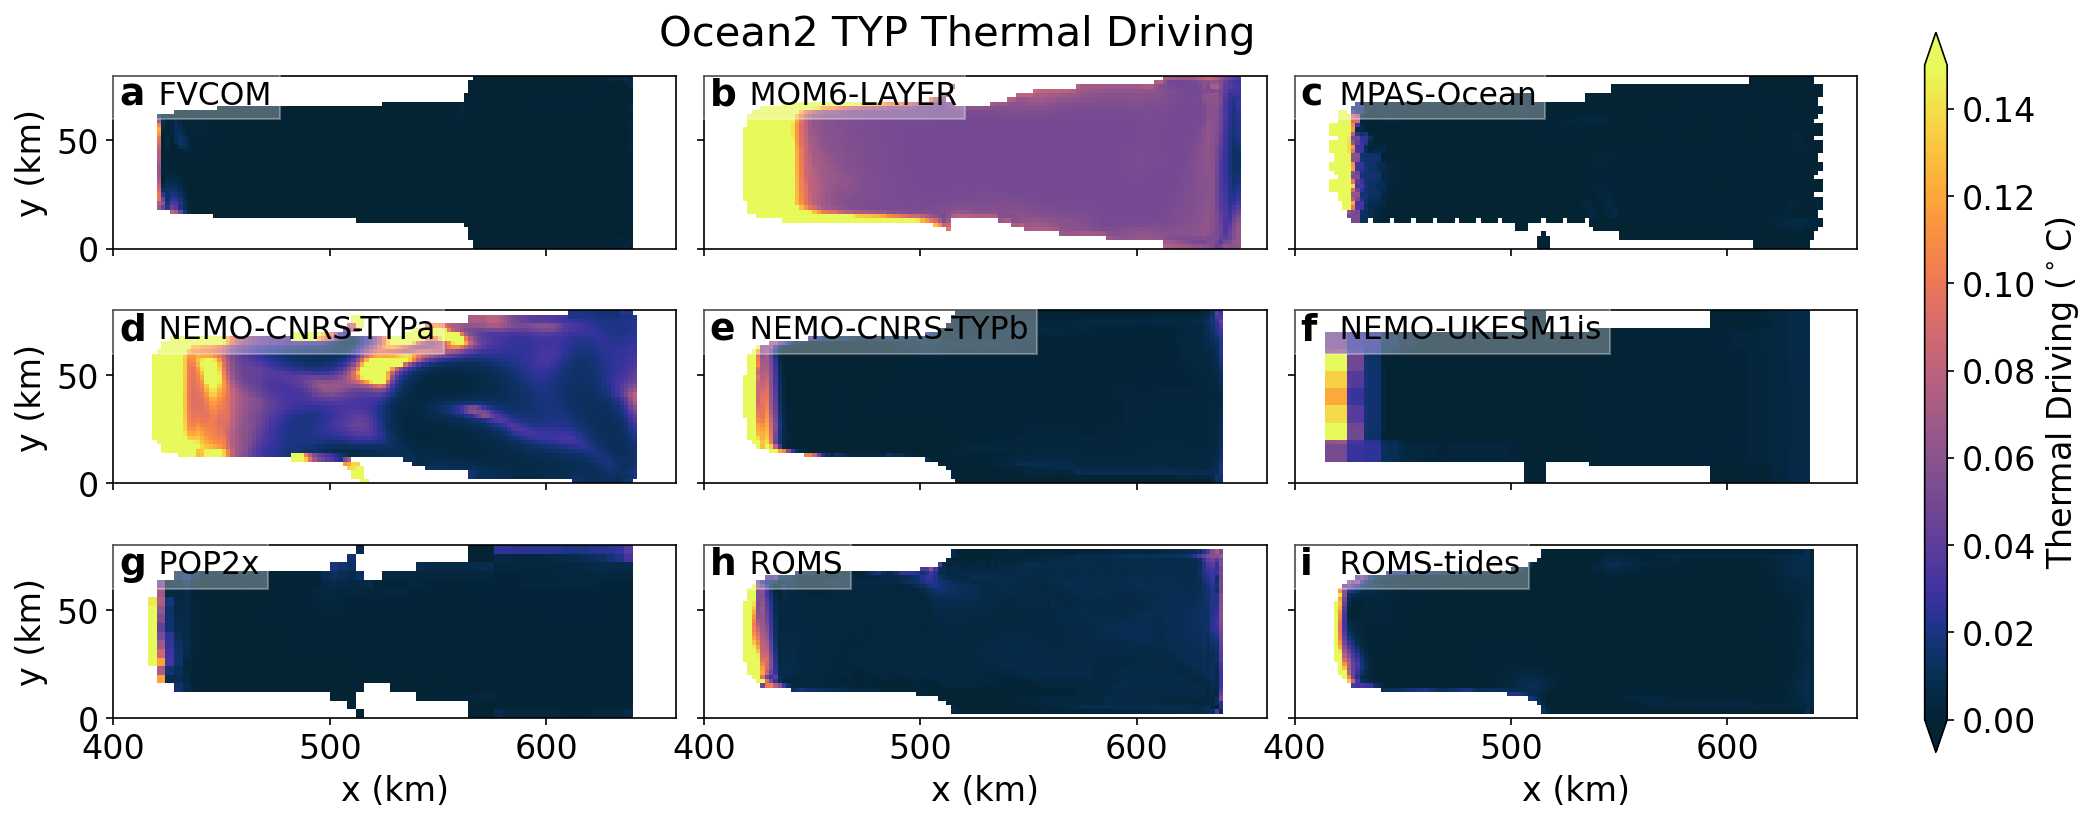

In [5]:
expt = Ocean2_TYP
labels = get_labels(expt)
length = len(expt)
alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m']
nrows = int(np.ceil(length/3))
fig = plt.figure(figsize=(15, 6),facecolor='w',dpi = 150)
time = 12

vmin = 0.
vmax = 0.15

xlim = [400., 660.]

for i in np.arange(length):
    ax = plt.subplot(3,nrows,i+1)
    ds = xr.open_dataset(basedrive+expt[i], decode_times=False)
    # make x and y coordinates
    ds = ds.set_coords(['x', 'y', 'time'])
    nTime = ds.sizes['nTime']
    td = ds.thermalDriving.isel(nTime=slice(nTime-12, nTime)).mean('nTime')
    # mr < 1e36 is to get rid of fill values.
    td = td.where(td < 1e36)
    mesh = plt.pcolormesh(
        1e-3 * ds.x.values, 1e-3 * ds.y.values, td.values, 
        cmap=cm.cm.thermal, vmin=vmin, vmax=vmax, shading='nearest')
    plt.xlim(xlim)
    mesh.axes.set_aspect('equal')
    
    plt.text(0.01,0.975,'    '+labels[i], fontsize = 15, transform=ax.transAxes, va='top',color = 'k',bbox=dict(facecolor='w', alpha=0.3,ec = 'w'))
    plt.text(0.01,0.99,alphabet[i], fontsize = 18, transform=ax.transAxes, fontweight='bold', va='top')
    if (i==1) or (i==2) or (i==4) or (i==5) or (i==8) or (i==7):
        ax.set_yticklabels([])
    if (i<6):
        ax.set_xticklabels([])
    if (i==0) or (i==3) or (i==6):
        plt.ylabel('y (km)', fontsize = 16)
    else:
        plt.ylabel('')
    if i>=6:
        plt.xlabel('x (km)', fontsize = 16)
    else:
        plt.xlabel('')
    plt.tick_params(labelsize=16)

cax = plt.axes([0.93, 0.1, 0.01, 0.8])
cbar = plt.colorbar(mesh, cax=cax, extend='both')
cbar.ax.set_ylabel(r'Thermal Driving ($^\circ$C)', fontsize=16)
plt.tick_params(labelsize=16)
fig.subplots_adjust(wspace = 0.05, hspace = 0.05)

fig.suptitle('Ocean2 TYP Thermal Driving', fontsize=20,y=0.92);